In [24]:
#Import the librairies
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

import seaborn as sns

#Import the dataset
data ='/Users/nathaliesaid/Desktop/MSCA 681/flight_data_2024_sample.xlsx'
flight_df = pd.read_excel(data)
print(flight_df.head())

   year  month  day_of_month  day_of_week    fl_date op_unique_carrier  \
0  2024      4            18            4 2024-04-18                MQ   
1  2024      1             1            1 2024-01-01                AA   
2  2024     12            12            4 2024-12-12                9E   
3  2024      4             8            1 2024-04-08                WN   
4  2024      2            16            5 2024-02-16                WN   

   op_carrier_fl_num origin       origin_city_name origin_state_nm  ...  \
0               3535    DFW  Dallas/Fort Worth, TX           Texas  ...   
1                148    CLT          Charlotte, NC  North Carolina  ...   
2               5440    CHA        Chattanooga, TN       Tennessee  ...   
3               1971    OMA              Omaha, NE        Nebraska  ...   
4                862    BWI          Baltimore, MD        Maryland  ...   

  diverted crs_elapsed_time actual_elapsed_time  air_time  distance  \
0        0              151      

## Clean the Dataset

### Remove none important independent variables

In [25]:
print(flight_df.columns)

flight_df.drop(['taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
    'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'], axis=1, inplace=True)
print(flight_df.columns)

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')
Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm',
       'crs_dep_time', 'dep_time', 'dep_delay', 'cancelled', 'distance'],
      dtype='object')


### Remove cancelled flights

In [26]:
flight_df = flight_df[flight_df['cancelled'] == 0]

print(flight_df)

      year  month  day_of_month  day_of_week    fl_date op_unique_carrier  \
0     2024      4            18            4 2024-04-18                MQ   
1     2024      1             1            1 2024-01-01                AA   
2     2024     12            12            4 2024-12-12                9E   
3     2024      4             8            1 2024-04-08                WN   
4     2024      2            16            5 2024-02-16                WN   
...    ...    ...           ...          ...        ...               ...   
9995  2024      1            16            2 2024-01-16                WN   
9996  2024      7             5            5 2024-07-05                AA   
9997  2024      2            28            3 2024-02-28                MQ   
9998  2024      2            18            7 2024-02-18                DL   
9999  2024      3             1            5 2024-03-01                G4   

      op_carrier_fl_num origin       origin_city_name origin_state_nm dest 

## Create new categories

In [28]:
flight_df['flight_delayed'] = (flight_df['dep_delay'] > 0).astype(int)
print(flight_df.head())

   year  month  day_of_month  day_of_week    fl_date op_unique_carrier  \
0  2024      4            18            4 2024-04-18                MQ   
1  2024      1             1            1 2024-01-01                AA   
2  2024     12            12            4 2024-12-12                9E   
3  2024      4             8            1 2024-04-08                WN   
4  2024      2            16            5 2024-02-16                WN   

   op_carrier_fl_num origin       origin_city_name origin_state_nm dest  \
0               3535    DFW  Dallas/Fort Worth, TX           Texas  RAP   
1                148    CLT          Charlotte, NC  North Carolina  PHX   
2               5440    CHA        Chattanooga, TN       Tennessee  ATL   
3               1971    OMA              Omaha, NE        Nebraska  LAS   
4                862    BWI          Baltimore, MD        Maryland  MYR   

     dest_city_name   dest_state_nm  crs_dep_time  dep_time  dep_delay  \
0    Rapid City, SD    South D

## Random Forest

In [29]:
from sklearn.model_selection import train_test_split

#Split the data into temp and test sets
temp_df, train_df = train_test_split(flight_df, test_size=0.6, random_state=42)

#Split the data into train and validation sets
test_df, validation_df = train_test_split(temp_df, test_size=0.5, random_state=42)

#Print the shapes
print(f"Train set: {train_df.shape[0]}")
print(f"Validation shape: {validation_df.shape[0]}")
print(f"Test shape: {test_df.shape[0]}")

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random

# Separate predictors (X) and target (y)
X_train = train_df.drop("flight_delayed", axis=1)
y_train = train_df["flight_delayed"]
X_validation = validation_df.drop("flight_delayed", axis=1)
y_validation = validation_df["flight_delayed"]
X_test = test_df.drop("flight_delayed", axis=1)
y_test = test_df["flight_delayed"]

# Encode the categorical columns you want to keep
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['op_unique_carrier', 'origin', 'dest']

for col in categorical_cols:
    # Fit on all data combined
    all_values = pd.concat([X_train[col], X_validation[col], X_test[col]]).astype(str)
    le = LabelEncoder()
    le.fit(all_values)
    
    # Transform each set
    X_train[col] = le.transform(X_train[col].astype(str))
    X_validation[col] = le.transform(X_validation[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Drop object columns and fl_date
columns_to_drop = ['fl_date', 'origin_city_name', 'origin_state_nm', 'dest_city_name', 'dest_state_nm','dep_delay','crs_dep_time','op_carrier_fl_num']
X_train = X_train.drop(columns_to_drop, axis=1)
X_validation = X_validation.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)

# Create the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': np.arange(3, 10, 1),      
    'min_samples_leaf': [0.01, 0.02],
    'max_features': [0.3, 0.5, 0.8, 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1,
    return_train_score = True
)

# Fit the grid search on the training data
random.seed(42)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Display the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Train set: 5927
Validation shape: 1976
Test shape: 1975
Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Best hyperparameters: {'max_depth': np.int64(7), 'max_features': 0.5, 'min_samples_leaf': 0.01, 'n_estimators': 100}


/var/folders/lv/m7nbq2492g5b9kzr0l3p2k8h0000gn/T/ipykernel_1555/3284985864.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_rf.head(10), palette='crest')


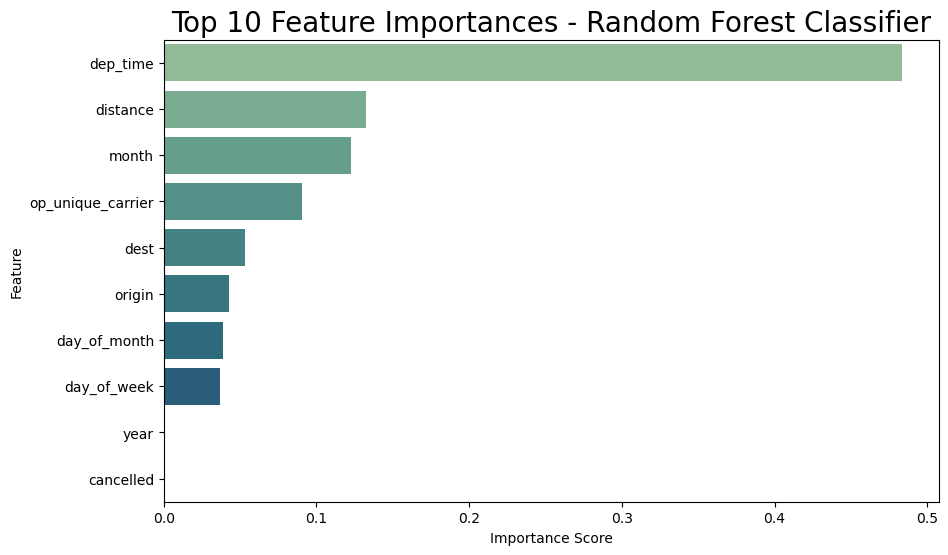

Top 3 Most Important Predictors:
    Feature  Importance
7  dep_time    0.483413
9  distance    0.132162
1     month    0.122763


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances from the tuned Random Forest model
importances = best_rf.feature_importances_

# Create a DataFrame for visualization
feature_importances_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances})

# Sort the DataFrame by importance
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf.head(10), palette='crest')
plt.title('Top 10 Feature Importances - Random Forest Classifier', fontsize=20)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display the top 3 predictors
print("Top 3 Most Important Predictors:")
print(feature_importances_rf.head(3))

Test Accuracy: 0.6668


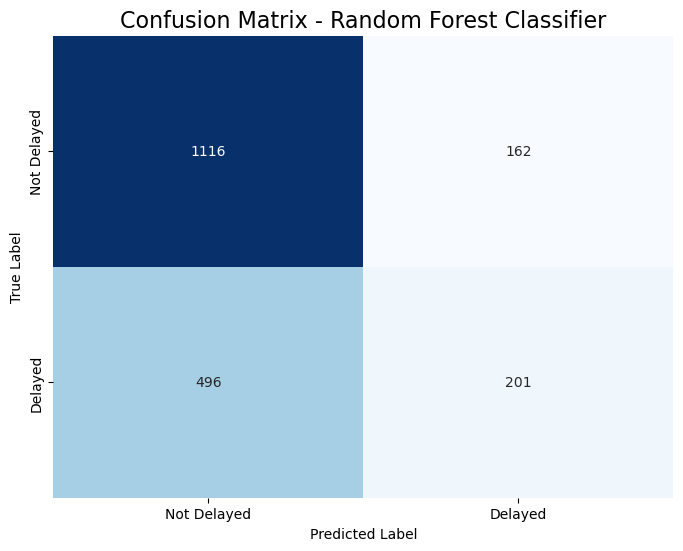


Classification Report:
              precision    recall  f1-score   support

 Not Delayed       0.69      0.87      0.77      1278
     Delayed       0.55      0.29      0.38       697

    accuracy                           0.67      1975
   macro avg       0.62      0.58      0.58      1975
weighted avg       0.64      0.67      0.63      1975



In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test set
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Delayed', 'Delayed'],
            yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix - Random Forest Classifier', fontsize=16)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Delayed', 'Delayed']))

# Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split
#Split the data into temp and test sets
temp_df, train_df = train_test_split(flight_df, test_size=0.6, random_state=42)

#Split the data into train and validation sets
test_df, validation_df = train_test_split(temp_df, test_size=0.5, random_state=42)

#Print the shapes
print(f"Train set: {train_df.shape[0]}")
print(f"Validation shape: {validation_df.shape[0]}")
print(f"Test shape: {test_df.shape[0]}")

Train set: 5927
Validation shape: 1976
Test shape: 1975


In [33]:
from sklearn.model_selection import train_test_split

X_train = train_df.drop("flight_delayed", axis=1)
y_train = train_df["flight_delayed"]

X_validation = validation_df.drop("flight_delayed", axis=1)
y_validation = validation_df["flight_delayed"]

X_test = test_df.drop("flight_delayed", axis=1)
y_test = test_df["flight_delayed"]

from sklearn.preprocessing import LabelEncoder
categorical_cols = ['op_unique_carrier', 'origin', 'dest']

for col in categorical_cols:
    all_values = pd.concat([X_train[col], X_validation[col], X_test[col]]).astype(str)
    le = LabelEncoder()
    le.fit(all_values)

    X_train[col] = le.transform(X_train[col].astype(str))
    X_validation[col] = le.transform(X_validation[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

columns_to_drop = ['fl_date', 'origin_city_name', 'origin_state_nm',
                   'dest_city_name', 'dest_state_nm','dep_delay',
                   'crs_dep_time','op_carrier_fl_num']

X_train = X_train.drop(columns_to_drop, axis=1)
X_validation = X_validation.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)


In [34]:
import statsmodels.formula.api as smf

formula = "flight_delayed ~ distance + month + day_of_week + op_unique_carrier+dep_time"
logit_model = smf.logit(formula=formula, data=train_df).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.619452
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         flight_delayed   No. Observations:                 5927
Model:                          Logit   Df Residuals:                     5908
Method:                           MLE   Df Model:                           18
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                 0.06796
Time:                        14:32:38   Log-Likelihood:                -3671.5
converged:                       True   LL-Null:                       -3939.2
Covariance Type:            nonrobust   LLR p-value:                3.698e-102
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.9406      0.233    -12.601      0.000      -3.398   

In [35]:
import numpy as np

# Predict probability of delay for each row in the training set using a 0.5 cutoff
train_df['Predicted_Prob'] = logit_model.predict(train_df)
# (>= 0.5 → predicted delayed, < 0.5 → predicted not delayed)
train_df['Predicted_Class'] = np.where(train_df['Predicted_Prob'] >= 0.5, 1, 0)
print(train_df[['flight_delayed', 'Predicted_Prob', 'Predicted_Class']].head(15))

      flight_delayed  Predicted_Prob  Predicted_Class
7098               0        0.125317                0
1982               0        0.304913                0
4080               0        0.223398                0
2849               0        0.275127                0
8961               1        0.292293                0
6386               0        0.257042                0
4020               0        0.318017                0
5208               1        0.522965                1
6211               0        0.623206                1
935                0        0.556346                1
107                1        0.395015                0
3719               0        0.375960                0
2756               0        0.322027                0
1228               1        0.584527                1
4869               1        0.455833                0


In [54]:
#For the traning set

import pandas as pd

# Create a confusion matrix
train_confusion_matrix = pd.crosstab(
    train_df['flight_delayed'],        
    train_df['Predicted_Class'],       
    rownames=['Actual'],
    colnames=['Predicted']
)
print(train_confusion_matrix)

Predicted     0    1
Actual              
0          3134  534
1          1458  801


In [52]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

y_true_train = train_df['flight_delayed']
y_pred_train = train_df['Predicted_Class']

precision = precision_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred)    # recall = sensitivity
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Precision:           {precision:.3f}")
print(f"Accuracy:            {accuracy:.3f}")
print(f"F1 Score:            {f1:.3f}")

Sensitivity (Recall): 0.355
Precision:           0.600
Accuracy:            0.664
F1 Score:            0.446


In [55]:
#For the test set
test_df['Predicted_Prob'] = logit_model.predict(test_df)

test_df['Predicted_Class'] = np.where(test_df['Predicted_Prob'] >= 0.5, 1, 0)

test_df[['flight_delayed', 'Predicted_Prob', 'Predicted_Class']].head()

test_confusion_matrix = pd.crosstab(
    test_df['flight_delayed'],
    test_df['Predicted_Class'],
    rownames=['Actual'],
    colnames=['Predicted']
)

print(test_confusion_matrix)

Predicted     0    1
Actual              
0          1103  175
1           467  230


In [51]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

y_true_test = test_df['flight_delayed']
y_pred_test = test_df['Predicted_Class']

sensitivity = recall_score(y_true_test, y_pred_test)
precision = precision_score(y_true_test, y_pred_test)
accuracy = accuracy_score(y_true_test, y_pred_test)
f1 = f1_score(y_true_test, y_pred_test)

print(f"Test Sensitivity (Recall): {sensitivity:.3f}")
print(f"Test Precision:           {precision:.3f}")
print(f"Test Accuracy:            {accuracy:.3f}")
print(f"Test F1 Score:            {f1:.3f}")

Test Sensitivity (Recall): 0.330
Test Precision:           0.568
Test Accuracy:            0.675
Test F1 Score:            0.417


# AUC scores

In [24]:
train_df.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,flight_delayed,Predicted_Prob,Predicted_Class
6252,2024,5,5,7,2024-05-05,DL,1060,ATL,"Atlanta, GA",Georgia,...,165.0,1184,67,0,0,0,16,1,0.392584,0
4684,2024,5,12,7,2024-05-12,G4,760,AZA,"Phoenix, AZ",Arizona,...,120.0,1006,0,0,0,0,0,0,0.394281,0
1731,2024,7,21,7,2024-07-21,WN,369,BWI,"Baltimore, MD",Maryland,...,110.0,787,12,0,0,0,31,1,0.517884,1
4742,2024,10,16,3,2024-10-16,WN,4173,PIT,"Pittsburgh, PA",Pennsylvania,...,159.0,1290,0,0,0,0,0,1,0.469271,0
4521,2024,3,27,3,2024-03-27,OH,5604,ILM,"Wilmington, NC",North Carolina,...,40.0,185,0,0,0,0,38,1,0.332551,0


In [48]:
from sklearn.metrics import roc_auc_score

# Calculate AUC using actual vs predicted probabilities
auc_train = roc_auc_score(train_df['flight_delayed'], train_df['Predicted_Prob'])

print(f"Training AUC: {auc_train:.3f}")

Training AUC: 0.676


In [47]:
from sklearn.metrics import roc_auc_score
test_df['Predicted_Prob'] = logit_model.predict(test_df)
# Calculate the AUC for the test set
auc_test = roc_auc_score(test_df['flight_delayed'], test_df['Predicted_Prob'])

print(f"Test AUC: {auc_test:.3f}")

Test AUC: 0.676


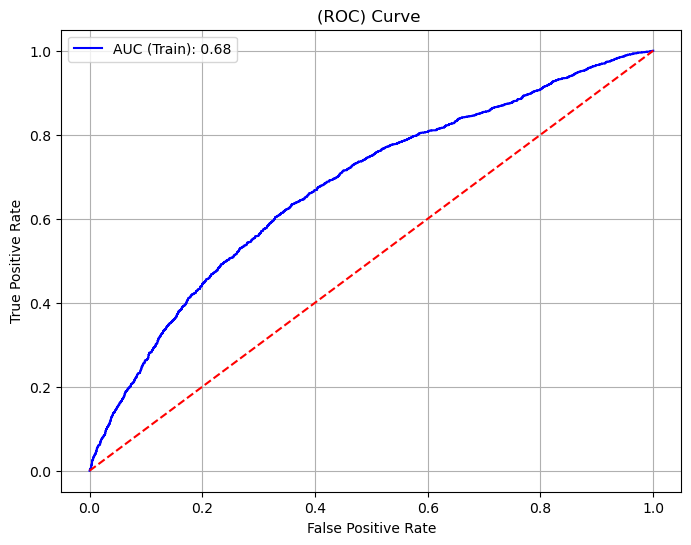

In [52]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#Calculate ROC curve values
fpr_train, tpr_train, thresholds_train = roc_curve(
    train_df['flight_delayed'], 
    train_df['Predicted_Prob']
)

#Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'AUC (Train): {auc_train:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red') 
plt.title('(ROC) Curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()